In [3]:
setwd("C:/Users/AYUSH/OneDrive - ABES/Desktop/Product Review")

In [1]:
library(devtools)
library(Rmazon)
library(dplyr)
library(stringi)
library(tm)
library(tidytext)
library(wordcloud)
library(ggplot2)
library(tidyr)
library(mgsub)
library(scales) 
library(stringr)
library(textdata)
library(widyr)

Loading required package: usethis


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: NLP

Loading required package: RColorBrewer


Attaching package: 'ggplot2'


The following object is masked from 'package:NLP':

    annotate




In [ ]:
#Scraping reviews of product

In [ ]:
bose.headphones.reviews <- get_reviews("B0117RGG8E")

In [ ]:
#Saving the review dataset

In [ ]:
save(bose.headphones.reviews, file = "data/bose.headphones.reviews.RData")

In [ ]:
#Loading the review dataset

In [4]:
load("data/bose.headphones.reviews.Rdata")

In [5]:
# Ignore the reviewers that didn't buy the product. 
# Verified_Purchase should be TRUE

In [6]:
bose.headphones.reviews <- filter(bose.headphones.reviews, Verified_Purchase==TRUE)

In [27]:
#Clean the reviews text, prepare for analysis.----

In [28]:
# Load "Stop Words" from the tidytext package

In [7]:
data("stop_words")

In [8]:
bose.headphones.reviews.text <- bose.headphones.reviews %>% select(reviewText)

In [31]:
#Check Encoding and Make it consistent

In [9]:
stri_enc_mark(bose.headphones.reviews.text$reviewText)
bose.headphones.reviews.text$reviewText <- sapply(bose.headphones.reviews.text$reviewText,function(row) iconv(row,"latin1","ASCII",sub = " "))

[1] "ASCII" "UTF-8" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8"
  [10] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
  [19] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
  [28] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
  [37] "UTF-8" "UTF-8" "UTF-8" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII"
  [46] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8"
  [55] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII"
  [64] "ASCII" "ASCII" "UTF-8" "UTF-8" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII"
  [73] "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "UTF-8" "ASCII" "ASCII" "ASCII"
  [82] "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
  [91] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "UTF-8"
 [100] "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [109] "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8"
 [118] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [127] "UTF-8" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII"
 [136] "ASCII" "ASCII" "ASCII" "UTF-8" "UTF-8" "ASCII" "UTF-8" "ASCII" "ASCII"
 [145] "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII"
 [154] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII"
 [163] "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII" "UTF-8"
 [172] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII"
 [181] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [190] "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII" "UTF-8" "UTF-8" "ASCII" "ASCII"
 [199] "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [208] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [217] "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII"
 [226] "UTF-8" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "UTF-8" "UTF-8" "ASCII"
 [235] "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [244] "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII" "UTF-8"
 [253] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [262] "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [271] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [280] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII"
 [289] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII"
 [298] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII"
 [307] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "UTF-8"
 [316] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8"
 [325] "ASCII" "ASCII" "ASCII" "UTF-8" "UTF-8" "ASCII" "UTF-8" "UTF-8" "ASCII"
 [334] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [343] "UTF-8" "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII"
 [352] "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [361] "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "UTF-8" "ASCII" "ASCII" "ASCII"
 [370] "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "UTF-8" "ASCII" "ASCII"
 [379] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [388] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [397] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII"
 [406] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII" "ASCII"
 [415] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII" "ASCII"
 [424] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "UTF-8" "ASCII"
 [433] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [442] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII"
 [451] "ASCII" "ASCII" "ASCII" "ASCII" "ASCII" "ASCII

In [33]:
# Lowecase all text

In [10]:
bose.headphones.reviews.text$reviewText <- tolower(bose.headphones.reviews.text$reviewText)

In [35]:
# make wasn't=was not, can't=can not, etc..

In [11]:
bose.headphones.reviews.text$reviewText <- gsub("wasn[\u2019']t", "was not", bose.headphones.reviews.text$reviewText)
bose.headphones.reviews.text$reviewText <- gsub("won[\u2019']t", "will not", bose.headphones.reviews.text$reviewText)
bose.headphones.reviews.text$reviewText <- gsub("can[\u2019']t", "can not", bose.headphones.reviews.text$reviewText)
bose.headphones.reviews.text$reviewText <- gsub("didn[\u2019']t", "did not", bose.headphones.reviews.text$reviewText)
bose.headphones.reviews.text$reviewText <- gsub("don[\u2019']t", "do not", bose.headphones.reviews.text$reviewText)
bose.headphones.reviews.text$reviewText <- gsub("I[\u2019']m", "I am", bose.headphones.reviews.text$reviewText)
bose.headphones.reviews.text$reviewText <- gsub("[\u2019']ve", " have", bose.headphones.reviews.text$reviewText) 
bose.headphones.reviews.text$reviewText <- gsub("[\u2019|']s", "", bose.headphones.reviews.text$reviewText)
bose.headphones.reviews.text$reviewText <- gsub("[\u2019']re", " are", bose.headphones.reviews.text$reviewText)
bose.headphones.reviews.text$reviewText <- gsub("[\u2019']ll", " will", bose.headphones.reviews.text$reviewText)

In [37]:
#Fix common typos

In [12]:
bose.headphones.reviews.text$reviewText<- gsub("canceling", "cancelling", bose.headphones.reviews.text$reviewText)
bose.headphones.reviews.text$reviewText <- gsub("cancellation", "cancelling", bose.headphones.reviews.text$reviewText)

In [39]:
#Remove numbers in the text

In [13]:
bose.headphones.reviews.text$reviewText <- removeNumbers(bose.headphones.reviews.text$reviewText)

In [41]:
# Remove punctuations in the text

In [14]:
bose.headphones.reviews.text$reviewText <- removePunctuation(bose.headphones.reviews.text$reviewText)

In [43]:
# Fix Negations
# Creating a list to identify the sentiment shifters in the text

In [15]:
negation.words <- c("not","no","without","never","bad","none","never","nobody","nowhere","neither","nothing")

In [45]:
#to view Shifted sentiments sorted by polarity point

In [16]:
shifted.words <- bose.headphones.reviews.text %>%
  unnest_tokens(bigram, reviewText, token = "ngrams", n = 2)%>%
  count(bigram, sort = TRUE) %>%
  separate(bigram, c("word1", "word2"), sep = " ")%>%
  filter(word1 %in% negation.words & !word2 %in% stop_words$word)%>%
  inner_join(get_sentiments("bing"), by = c(word2 = "word"))%>%
  mutate(sentiment = ifelse(sentiment == "positive", 1, -1)) %>%
  mutate(score = sentiment * n) %>%
  mutate(word2 = reorder(word2, score))

shifted.words

Warning message:
"Outer names are only allowed for unnamed scalar atomic inputs"


word1,word2,n,sentiment,score
<chr>,<fct>,<int>,<dbl>,<dbl>
not,worth,17,1,17
not,noise,16,-1,-16
no,issues,13,-1,-13
no,complaints,9,-1,-9
not,recommend,8,1,8
not,disappoint,5,-1,-5
never,disappoints,4,-1,-4
no,noise,4,-1,-4
not,disappointed,4,-1,-4


In [47]:
# Picking the most effective sentiment shifters

In [17]:
negated.phrases <- c("not worth","not noise","no issues","no complaints","not disappoint","not disappointed","not cheap","no regrets")

In [49]:
# Find synonyms for the phrases above to replace

In [18]:
synonyms <- c("expensive","functional","cool","satisfied","satisfied","satisfied","expensive","satisfied")

In [51]:
## Replacing the negations with their synonyms.

In [20]:
bose.headphones.reviews.text <- mgsub(bose.headphones.reviews.text$reviewText, negated.phrases, synonyms) %>% dplyr::as_data_frame() %>% rename(reviewText = value)

In [ ]:
# ignoring words that are frequent but doesn't help, add them to this list.

In [22]:
ignore.words <- data_frame(word = c("sound", "bose", "headphones","noise", "soundlink"))

In [ ]:
# create the words freq table

In [23]:
word.freq.table<- bose.headphones.reviews.text %>% 
  unnest_tokens(word, reviewText) %>%
  anti_join(stop_words) %>%
  anti_join(ignore.words) %>%
  count(word, sort = TRUE)
word.freq.table

Joining, by = "word"
Joining, by = "word"


word,n
<chr>,<int>
quality,621
comfortable,348
bluetooth,319
love,272
battery,265
music,212
cancelling,211
phone,210
pair,208


In [59]:
# Plotting a Wordcloud

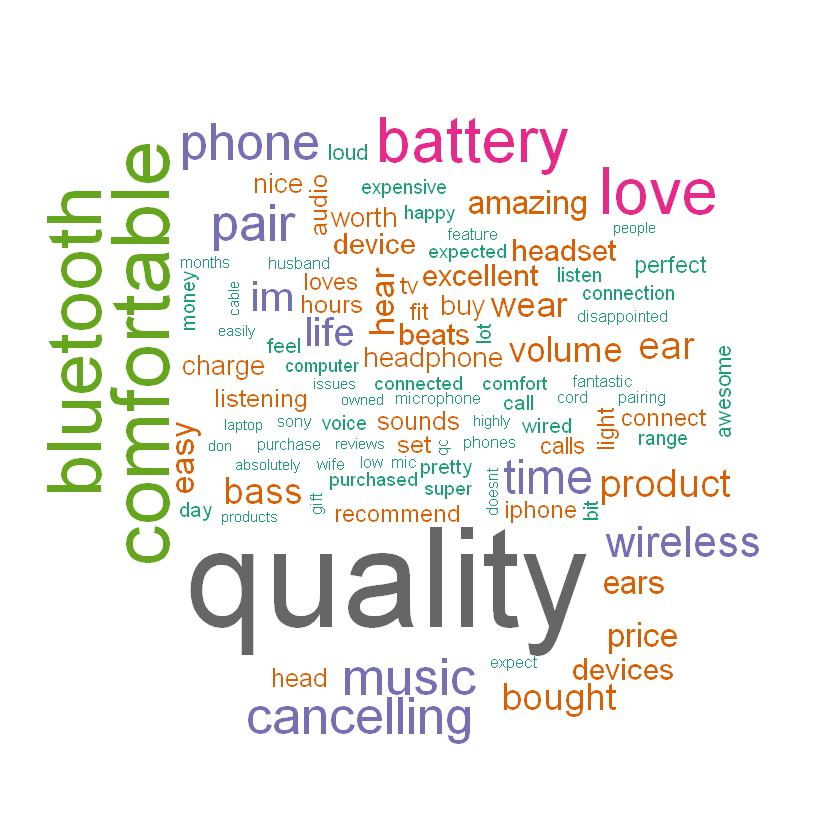

In [24]:
word.freq.table %>% 
  filter(n>40) %>%
  with(wordcloud(word, n,
                 scale = c(5,0.3),
                 colors = brewer.pal(8, "Dark2")))

In [66]:
# Most Common Bigrams

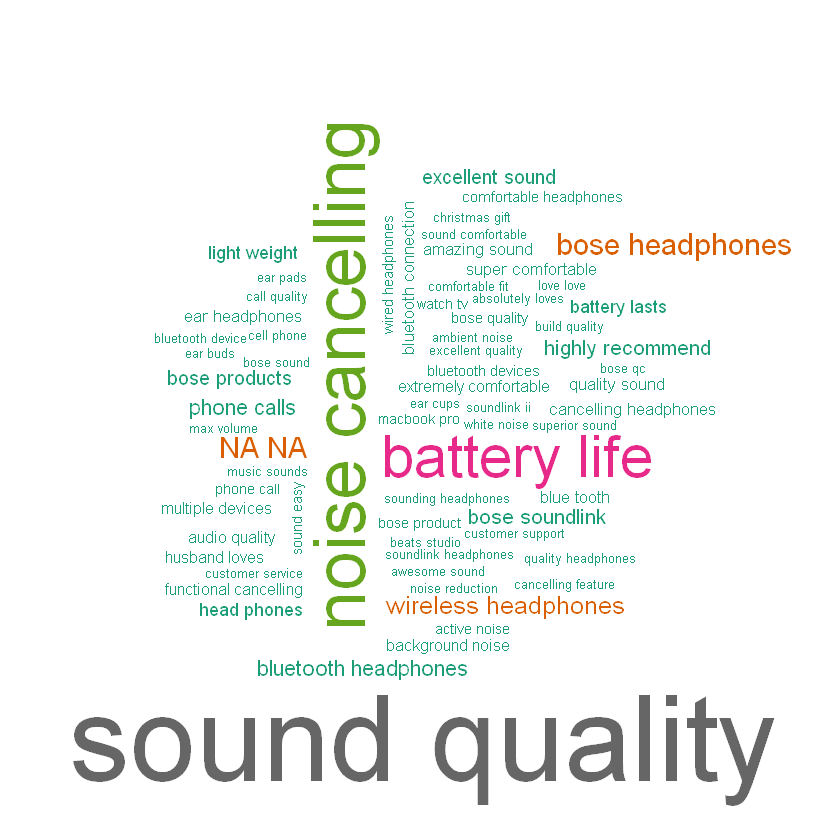

In [25]:
bose.headphones.reviews.text %>%
  unnest_tokens(bigram, reviewText, token = "ngrams", n = 2) %>%
  count(bigram, sort = TRUE) %>%
  separate(bigram, c("word1", "word2"), sep = " ") %>%
  filter(!word1 %in% stop_words$word & !word2 %in% stop_words$word) %>%
  filter(n>7) %>%
  unite(word, word1:word2, sep = " ") %>%
  with(wordcloud(word, n,
                 scale = c(3,0.5),
                 colors = brewer.pal(8, "Dark2")))

In [70]:
# Most common Positive and Negative words using Bing

Joining, by = "word"
Joining, by = "word"
Joining, by = "word"


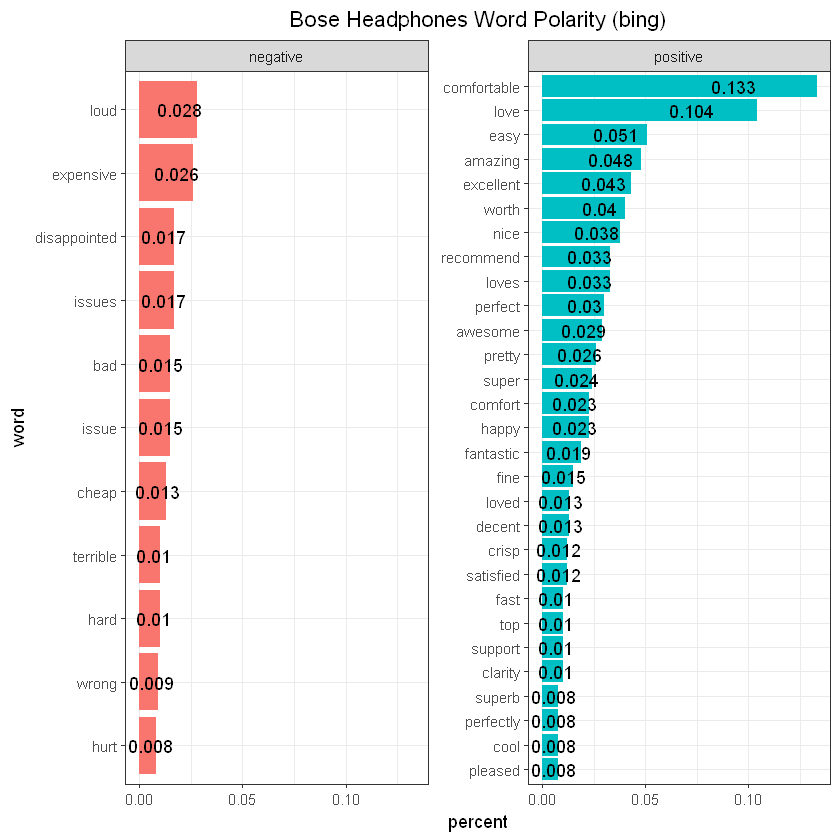

In [26]:
bose.headphones.reviews.text %>% 
  unnest_tokens(word, reviewText) %>%
  anti_join(stop_words) %>%
  anti_join(ignore.words) %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  filter(n > 20) %>%
  mutate(word = reorder(word, n)) %>%
  mutate(percent = round(n/sum(n), 3)) %>%
  ggplot(aes(x = word, y = percent, fill = sentiment, label = percent)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  geom_text(aes(y = 0.7*percent)) +
  labs(title = "Bose Headphones Word Polarity (bing)") +
  coord_flip() + 
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5))

In [72]:
# Bing

In [27]:
bing.mean.score <- word.freq.table %>% 
  inner_join(get_sentiments("bing")) %>%
  mutate(sentiment = ifelse(sentiment == "positive", 1, -1)) %>%
  summarise(mean = mean(sentiment))

Joining, by = "word"


In [74]:
# rescale the range to 5 star range.

In [28]:
bing.mean.score<-rescale(bing.mean.score$mean, to = c(1,5), from = c(-1,1))

In [76]:
# Afinn scores are from -5 to 5.

In [29]:
tns <- getNamespace("textdata")
assignInNamespace(x = "printer", value = function(...) 1, ns = tns)
afinn.mean.score <- word.freq.table %>% 
  inner_join(get_sentiments("afinn"))%>%
  summarise(mean = mean(value))

Joining, by = "word"


In [ ]:
# rescale the range to 5 star range.

In [30]:
afinn.mean.score<-rescale(afinn.mean.score$mean, to = c(1,5), from = c(-5,5))

In [83]:
#Correlation Terms

In [84]:
#The correlation of appearing together in a review

In [31]:
bose.correlation.terms <- bose.headphones.reviews.text %>%
  mutate(review = row_number()) %>%
  unnest_tokens(word, reviewText) %>%
  filter(!word %in% stop_words$word) %>%
  group_by(word) %>%
  filter(n() >= 5)%>%
  pairwise_cor(word, review, sort = TRUE)
bose.correlation.terms

item1,item2,correlation
<chr>,<chr>,<dbl>
tooth,blue,0.8301430
blue,tooth,0.8301430
noise,cancelling,0.7628740
cancelling,noise,0.7628740
life,battery,0.7140720
battery,life,0.7140720
skip,pause,0.6655297
pause,skip,0.6655297
service,customer,0.6399967


In [ ]:
bose.correlation.terms %>%
  filter(correlation >= 0.50) %>%
  graph_from_data_frame() %>%
  ggraph(layout = "igraph", algorithm = "kk") +
  geom_edge_link(aes(alpha = correlation), 
                 show.legend = FALSE)+
  geom_node_point(color = "lightblue", size = 2) +
  geom_node_text(aes(label = name), repel = TRUE) +
  theme_void()

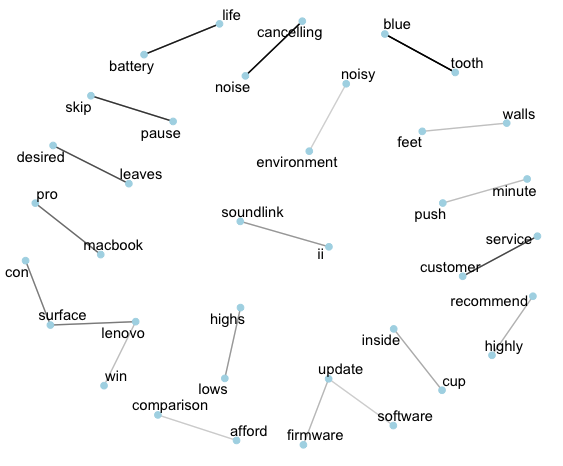

In [35]:
bigrams.network.df<-bose.headphones.reviews.text %>%
  unnest_tokens(bigram, reviewText, token = "ngrams", n = 2) %>%
  separate(bigram, c("word1", "word2"), sep = " ") %>%
  filter(!word1 %in% stop_words$word & !word2 %in% stop_words$word) %>%
  count(word1, word2, sort = TRUE) %>%
  filter(n > 5)

In [ ]:
bigrams.network <- graph_from_data_frame(bigrams.network.df)

In [ ]:
# now we find the centrality measures of the network
# degree:the number of its adjacent edges (measure of direct influence)

In [40]:
deg <- degree(bigrams.network, mode = "all")

ERROR: Error in degree(bigrams.network, mode = "all"): could not find function "degree"


In [ ]:
#K-core decomposition allows us to identify the core and the periphery of the network. 
#A k-core is a maximal subnet of a network such that all nodes have at least degree K.

In [ ]:
core <- coreness(bigrams.network, mode = "all")

In [ ]:
# betweenness measures brokerage or gatekeeping potential. 
#It is (approximately) the number of shortest paths between nodes that pass through a particular node.

In [ ]:
betw <- betweenness(bigrams.network)

In [ ]:
#Eigenvector centrality is a measure of being well-connected connected to the well-connected. #First eigenvector of the graph adjacency matrix. Only works with undirected networks.

In [ ]:
eigen <- eigen_centrality(bigrams.network, directed = TRUE)
members <- cluster_walktrap(bigrams.network)

bigrams.network <- simplify(bigrams.network, 
                            remove.multiple = FALSE,
                            remove.loops = TRUE)
V(bigrams.network)$color <- members$membership+1

In [ ]:
# Using "Coreness" as size
# Coreness -> mean (average distance to all the other nodes, diffusion of information)

In [ ]:
plot(bigrams.network,
     layout = layout_with_fr,
     vertex.label.color = "black",
     vertex.label.cex = 0.9,
     vertex.label.dist = 0,
     vertex.frame.color = 0,
     vertex.size = core*10, 
     edge.arrow.size = 0.01,
     edge.curved = 0.7,
     edge.color = "gray",
     main = "Bigram Communities (Bose Headphones)"
)
mtext("Coreness")

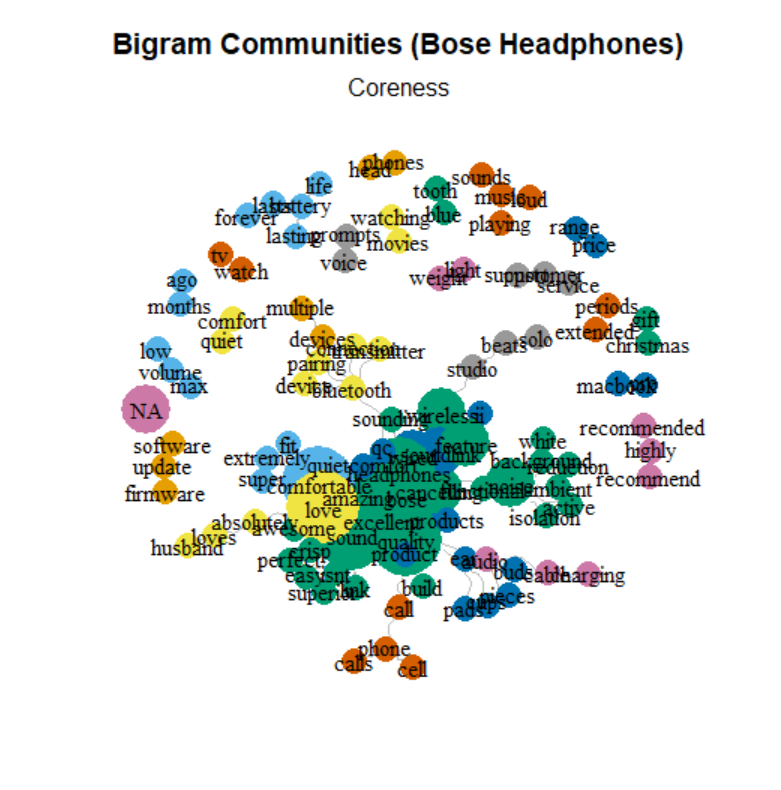

In [ ]:
# Using "Degree" as size
# degree=mode (number of edges of the node, in-degree:prestige

In [ ]:
plot(bigrams.network,
     layout = layout_with_fr,
     vertex.label.color = "black",
     vertex.label.cex = 0.9,
     vertex.label.dist = 0,
     vertex.frame.color = 0,
     vertex.size = deg, 
     edge.arrow.size = 0.01,
     edge.curved = 0.7,
     edge.color = "gray",
     main = "Bigram Communities (Bose Headphones)"
)
mtext("Degree")

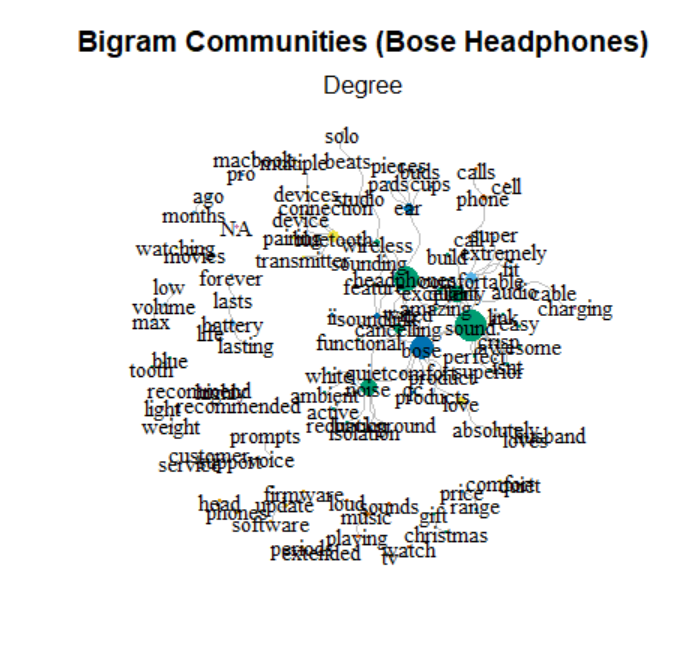

In [ ]:
# Using "Eigenvector Centrality" as size
# centrality (the most connected words)

In [ ]:
plot(bigrams.network,
     layout = layout_with_fr,
     vertex.label.color = "black",
     vertex.label.cex = 0.8,
     vertex.label.dist = 0,
     vertex.size = eigen$vector*20, 
     edge.arrow.size = 0.01,
     edge.curved = 0.7,
     edge.color = "black",
     main = "Bigram Communities (Bose Headphones)"
)
mtext("Eigenvector Centrality")

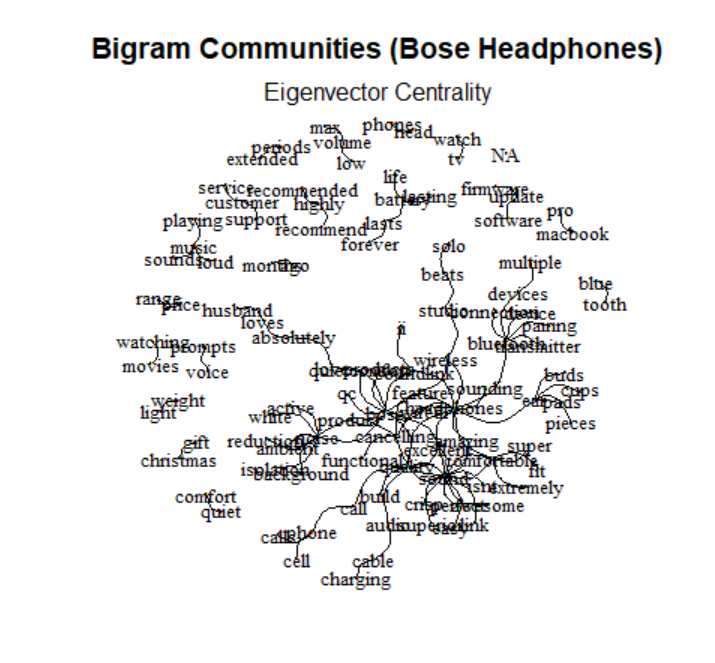

In [ ]:
# Using "Betweenness" as size
# Betweenness -> median (weighted # of paths going through the node)

In [ ]:
plot(bigrams.network,
     layout = layout_with_fr,
     vertex.label.color = "black",
     vertex.label.cex = 0.8,
     vertex.label.dist = 0,
     vertex.size = betw, 
     edge.arrow.size = 0.01,
     edge.curved = 0.7,
     edge.color = "lightgrey",
     main = "Bigram Communities (Bose Headphones)"
)
mtext("Betweenness")

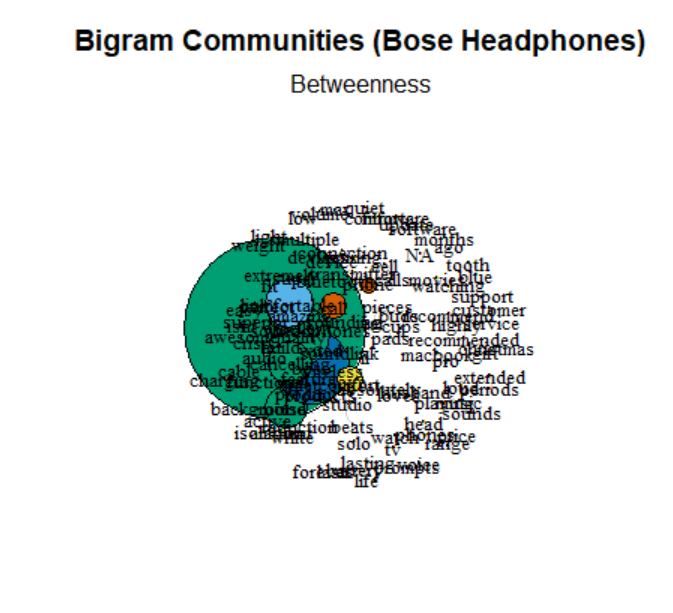

In [ ]:
y_mid = 0
x_mid = 3.5

review_summary %>% 
  mutate(quadrant = case_when(mean_rating > x_mid & sentiment > y_mid   ~ "Positive Review/Postive Sentiment",
                              mean_rating <= x_mid & sentiment > y_mid  ~ "Negative Review/Positive Sentiment",
                              mean_rating <= x_mid & sentiment <= y_mid ~ "Negative Review/Negative Sentiment",
                              TRUE                                      ~ "Positive Review/Negative Sentiment")) %>% 
  ggplot(aes(x = mean_rating, y = sentiment, color = quadrant)) + 
  geom_hline(yintercept=y_mid, color = "black", size=.5) + 
  geom_vline(xintercept=x_mid, color = "black", size=.5) +
  guides(color=FALSE) +
  scale_color_manual(values=c("lightgreen", "pink", "pink","lightgreen")) +
  ggtitle("Amazon Product Rating vs Sentiment Rating of Review") +
  ggplot2::annotate("text", x = 4.33, y=3.5,label="Positive Review/Postive Sentiment") +
  ggplot2::annotate("text", x = 2, y=3.5,label="Negative Review/Positive Sentiment") +
  ggplot2::annotate("text", x = 4.33, y=-2.5,label="Positive Review/Negative Sentiment") +
  ggplot2::annotate("text", x = 2, y=-2.5,label="Negative Review/Negative Sentiment") +
  geom_point()

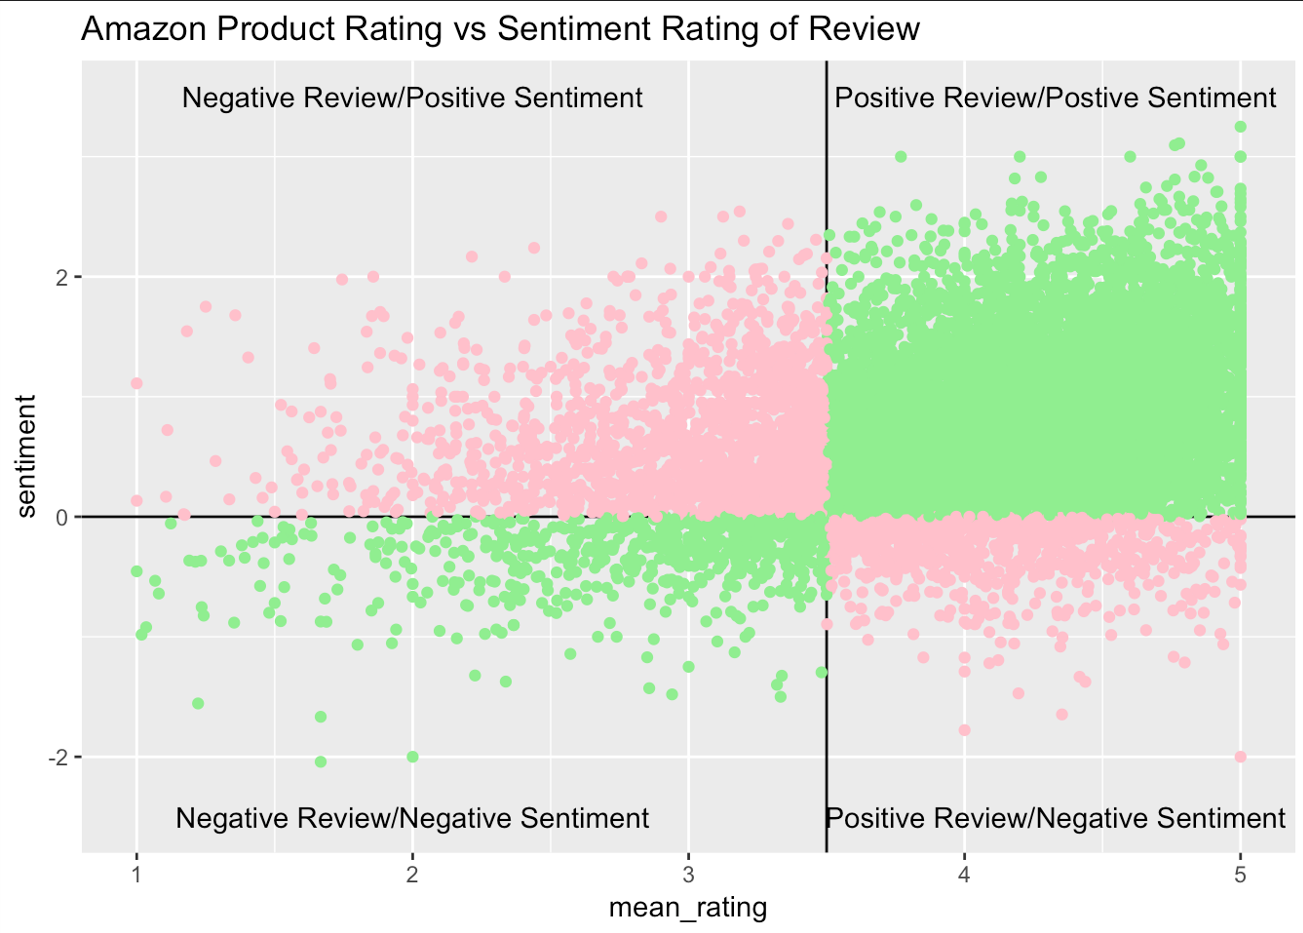